<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Разбиваем-данные-на-выборки-и-продолжаем-подготавливать-данные" data-toc-modified-id="Разбиваем-данные-на-выборки-и-продолжаем-подготавливать-данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбиваем данные на выборки и продолжаем подготавливать данные</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Обучим-модели-без-учёта-дисбаланса" data-toc-modified-id="Обучим-модели-без-учёта-дисбаланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обучим модели без учёта дисбаланса</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span></li><li><span><a href="#Уменьшение-выборки-(downsampling)" data-toc-modified-id="Уменьшение-выборки-(downsampling)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уменьшение выборки (downsampling)</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Необходимо проверить *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряя *AUC-ROC*, сравнивая её значение с *F1*-мерой.

# Цель исследования
1. Построить модель с максимально большим значением F1-меры, которая спрогнозирует уход клиента из банка.


# Ход исследования
Данные о поведении клиентов, которые уже перешли на эти тарифы мы получим из файла '/datasets/Churn.csv'. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. Мы проверим данные на ошибки.. Затем, на этапе предобработки мы будем искать возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. Далее приступим к целям исследования и построению наилучшей модели.<br>

Таким образом, исследование пройдёт в восемь этапов:<br>

• Обзор данных<br>
• Предобработка данных<br>
• Исследования баланса классов<br>
• Улучшение качества модели с учетом дисбаланса классов<br>
• Выявление лучшей модели<br>
• Написание промежуточных выводов<br>
• Проведение финального тестирования<br>
• Написание общего вывода

## Подготовка данных

In [40]:
#Импортируем необходимые библиотеки
import pandas as pd
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
#Открываем файл с данными и изучаем его
try:
    data = pd.read_csv('/datasets/Churn.csv')
except:
    pass

In [42]:
#Ознакамливаемся с датафреймом
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [43]:
#Находим количество пропущенных значений в столбцах и изучаем их
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [44]:
#Проверяем колличество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
RowNumber,0.000000
CustomerId,0.000000
Surname,0.000000
CreditScore,0.000000
Geography,0.000000
Gender,0.000000
Age,0.000000
Tenure,9.000000
Balance,0.000000
NumOfProducts,0.000000


In [45]:
#Проверяем количество явных дубликатов
data.duplicated().sum()

0

In [46]:
#Удаляем пропущенные значения в столбце "Tenure — сколько лет человек является клиентом банка"
data = data.dropna(subset=['Tenure'])

In [47]:
#Проверяем количество пропусков
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [48]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9091.000000,9.091000e+03,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,5013.909911,1.569105e+07,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,2884.433466,7.161419e+04,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2521.500000,1.562899e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,5019.000000,1.569106e+07,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,7511.500000,1.575285e+07,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,9999.000000,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [49]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


### Вывод
Мы ознакомились с представленным датафреймом и провели предобработку данных. Всего в датафрейме 14 столбцов и 10 000 записи. Имеются пропущенные значения в столбце "Tenure — сколько лет человек является клиентом банка". Пропуски в данном столбце составляют 9% от всего датафрейма, поэтому было принято решение удалить пропущенные строки.
После удаления пропущенных значений, в датафрейме осталось 9 091 записи. Дубликатов невыявлено.<br>

Целевым признаком является: <br>
• Exited — факт ухода клиента<br>

Признаками являются:<br>
• RowNumber — индекс строки в данных<br>
• CustomerId — уникальный идентификатор клиента<br>
• Surname — фамилия<br>
• CreditScore — кредитный рейтинг<br>
• Geography — страна проживания<br>
• Gender — пол<br>
• Age — возраст<br>
• Tenure — сколько лет человек является клиентом банка<br>
• Balance — баланс на счёте<br>
• NumOfProducts — количество продуктов банка, используемых клиентом<br>
• HasCrCard — наличие кредитной карты<br>
• IsActiveMember — активность клиента<br>
• EstimatedSalary — предполагаемая зарплата<br>

## Разбиваем данные на выборки и продолжаем подготавливать данные


In [51]:
#Мы выявили тип данных object в нескольких столбцах (Surname, Geography, Gender)
#Применяем прямое кодирование к столбцам Geography и Gender, столбец Surname в признаках удалили

data = pd.get_dummies(data, columns=['Gender','Geography'], drop_first= True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [53]:
#Объявим две переменные
#Удалим в признаках столбцы RowNumber, CustomerId и Surname, так как данные этих столбцов не повлияют на качество обучения

features = data.drop(['Exited','RowNumber','CustomerId', 'Surname'], axis=1)
target = data['Exited']

In [54]:
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split
features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(data, target = 'Exited',train_size=0.6, valid_size=0.2, test_size=0.2)

In [55]:
#Разбиваем исходные данные на три выборки
#Обучающая выборка
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

#Проверяем размер выборки
print('Размер обучающей выборки:')
print(features_train.shape)
print(target_train.shape)

Размер обучающей выборки:
(5454, 11)
(5454,)


In [56]:
#Валидационная и тестовая выборки
features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345, stratify=target_test)

#Проверяем размер выборок
print('Размер валидационной выборки:')
print(features_valid.shape)
print(target_valid.shape)

print()

print('Размер тестовой выборки:')
print(features_test.shape)
print(target_test.shape)

Размер валидационной выборки:
(1818, 11)
(1818,)

Размер тестовой выборки:
(1819, 11)
(1819,)


In [57]:
#Необходимо масштабировать признаки 
#Признаки, которые будем масштабировать: CreditScore, Balance и EstimatedSalary
numeric = ['CreditScore', 'Balance', 'EstimatedSalary', 'Age']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric]= scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 

pd.options.mode.chained_assignment = None
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


###  Вывод:
Мы объявили переменные и разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 (обучающая выборка - 60% от датасета, валидационная и тестовая выборки по 20%, соответственно). <br>
Мы применили прямое кодирование к категориальным данным, а так же масштабировали признаки.

## Исследование задачи

0    0.796062
1    0.203938
Name: Exited, dtype: float64


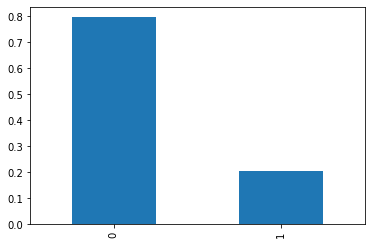

In [58]:
#Проверяем датасет на сбалансированность классов
class_frequency = data['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

Дисбаланс классов присутствует. Классы несбалансированны, когда их соотношение далеко от 1:1. Как мы наблюдаем, действительно, из «Бета-Банка» стали уходить клиенты. Немного, но заметно - примерно 20% от всех клиентов.

### Обучим модели без учёта дисбаланса

**Решающее дерево**

In [81]:
#Исследуем качество решающего дерева на валидационной выборке на f1 метрике
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
best_split_dt = 0
best_leaf_dt = 0
for depth in tqdm (range(1, 50, 2)):
    for split in range(2, 11):
        for leaf in range(1, 11):
            model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                              min_samples_split=split, min_samples_leaf=leaf)
            model_dt.fit(features_train, target_train)
            predicted_valid = model_dt.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            if result > best_result_dt:
                best_model_dt = model_dt
                best_result_dt = result
                best_depth_dt = depth
                best_split_dt = split
                best_leaf_dt = leaf
        
print('F1 лучшей модели:', best_result_dt) 
print('Глубина дерева:', best_depth_dt)
print('Минимальное количество примеров для разделения:', best_split_dt) 
print('Минимальное количество объектов в листе:', best_leaf_dt) 

100%|██████████| 25/25 [00:52<00:00,  2.11s/it]

F1 лучшей модели: 0.5939597315436241
Глубина дерева: 7
Минимальное количество примеров для разделения: 2
Минимальное количество объектов в листе: 3


F1-мера наилучшей модели решающего дерева на валидационной выборке: 0.59, при глубине дерева 7, минимальном количестве разделения 2 и минимальном количестве объектов в листе 3.

In [68]:
#Измерим AUC-ROC для модели решающего дерева 
probabilities_valid = model_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели решающего дерева:', auc_roc)

AUC-ROC лучшей модели решающего дерева: 0.8172638994704166


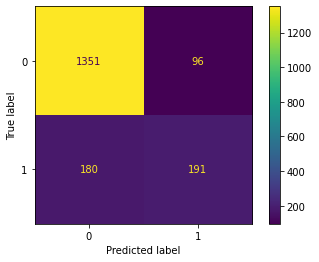

In [69]:
#Построим матрицу ошибок модели решающего дерева
cm_dt = confusion_matrix(target_valid, predicted_valid, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                              display_labels=model_dt.classes_)
disp.plot();

Матрица ошибок модели решающего дерева нам показывает, что истинно отрицательных ответов у нас большинство, что означает, что по прогнозу модели клиенты не уходили из банка и фактически клиенты не ушли из банка, то есть модель прогнозирует и работает корректно. 

**Случайный лес**

In [70]:
#Исследуем качество случайного леса на валидационной выборке
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est in tqdm (range(1, 50, 2)):
    for depth in range(1, 11):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predicted_valid = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result
            best_est_rf = est
            best_depth_rf = depth
            
print('F1 наилучшей модели:', best_result_rf)
print('Количество деревьев:', best_est_rf)
print('Максимальная глубина:', depth)

100%|██████████| 25/25 [00:26<00:00,  1.08s/it]

F1 наилучшей модели: 0.6016806722689076
Количество деревьев: 15
Максимальная глубина: 10


F1-мера наилучшей модели случайного леса на валидационной выборке: 0.60, при количестве деревьев 15 и глубине дерева 10.

In [74]:
#Измерим AUC-ROC для модели случайного леса
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели случайного леса:', auc_roc)

AUC-ROC лучшей модели случайного леса: 0.8763013726699167


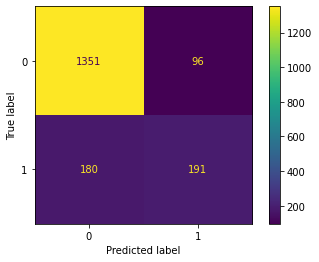

In [75]:
#Построим матрицу ошибок модели случайного леса
cm_rf = confusion_matrix(target_valid, predicted_valid, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=model_rf.classes_)
disp.plot();

Матрица ошибок модели случайного леса нам показывает, что истинно отрицательных ответов у нас большинство, соответственно модель прогнозирует и работает корректно.

**Логистическая регрессия**

In [76]:
%%time
#Исследуем качество логистической регрессии на валидационной выборке
model_lg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model_lg.fit(features_train, target_train) 
predicted_valid = model_lg.predict(features_valid)

print('F1 наилучшей модели:', f1_score(target_valid, predicted_valid))

F1 наилучшей модели: 0.3306772908366534
CPU times: user 42.9 ms, sys: 36 ms, total: 78.9 ms
Wall time: 58.6 ms


F1-метрика наилучшей модели логистической регрессии на валидационной выборке: 0.08.

In [77]:
#Измерим AUC-ROC для модели логистической регрессии
probabilities_valid = model_lg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели логистической регрессии:', auc_roc)

AUC-ROC лучшей модели логистической регрессии: 0.7892507409139087


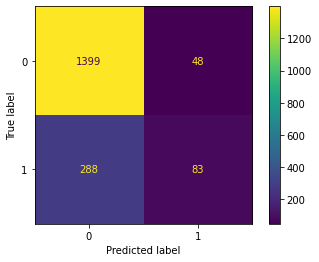

In [79]:
#Построим матрицу ошибок модели логистической регрессии
cm_lg = confusion_matrix(target_valid, predicted_valid, labels=model_lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lg,
                              display_labels=model_lg.classes_)
disp.plot();

Матрица ошибок модели случайного леса нам показывает, что истинно отрицательных ответов у нас большинство, соответственно модель прогнозирует и работает корректно.

###  Вывод:
Мы исследовали качество разных моделей без учёта дисбаланса, меняя гиперпараметры. <br>
Наилучшей моделью оказался случайный лес - F1-мера наилучшей модели на валидационной выборке составляет: 0.6016806722689076 при значении AUC-ROC: 0.8763013726699167.<br>
Второй по значимости моделью является решающее дерево - F1-мера лучшей модели: 0.5939597315436241 при значении AUC-ROC: 0.8172638994704166.<br>
Замыкающей моделью является логистическая регрессия - F1-мера наилучшей модели 0.3306772908366534 при значении AUC-ROC: 0.7892507409139087.<br>

Наулучшим значением AUC-ROC является 0.8763013726699167 при модели случайного леса.<br>

Мы построили матрицу ошибок для каждой модели, матрица у всех моделей нам так же показывает, что присутсвует дисбаланс классов.

## Борьба с дисбалансом

Чтобы увеличить качество модели при дисбалансе классов, мы применим три техники: взвешивание классов, upsampling и downsampling.

###  Взвешивание классов

**Решающее дерево**

In [82]:
#Исследуем качество решающего дерева на валидационной выборке на f1 метрике и взвесим классы
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
best_split_dt = 0
best_leaf_dt = 0
for depth in tqdm (range(1, 50, 2)):
    for split in range(2, 11):
        for leaf in range(1, 11):
            model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                              min_samples_split=split, min_samples_leaf=leaf, class_weight='balanced')
            model_dt.fit(features_train, target_train)
            predicted_valid = model_dt.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            if result > best_result_dt:
                best_model_dt = model_dt
                best_result_dt = result
                best_depth_dt = depth
                best_split_dt = split
                best_leaf_dt = leaf
        
print('F1 лучшей модели:', best_result_dt) 
print('Глубина дерева:', best_depth_dt)
print('Минимальное количество примеров для разделения:', best_split_dt) 
print('Минимальное количество объектов в листе:', best_leaf_dt) 

100%|██████████| 25/25 [00:54<00:00,  2.16s/it]

F1 лучшей модели: 0.5731108930323847
Глубина дерева: 5
Минимальное количество примеров для разделения: 2
Минимальное количество объектов в листе: 10


F1 решающего дерева после взвешивания классов стал хуже - 0.57 при глубине дерева 5, минимальном количестве разделения 2 и минимальном количестве объектов в листе 10.

In [83]:
#Измерим AUC-ROC для модели решающего дерева
probabilities_valid = model_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели решающего дерева:', auc_roc)

AUC-ROC лучшей модели решающего дерева: 0.8097616222428783


**Случайный лес**

In [84]:
#Исследуем качество случайного леса на валидационной выборке и взвесим классы
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est in tqdm (range(1, 50, 2)):
    for depth in range(1, 11):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_rf.fit(features_train, target_train)
        predicted_valid = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result
            best_est_rf = est
            best_depth_rf = depth
            
print('F1 наилучшей модели:', best_result_rf)
print('Количество деревьев:', best_est_rf)
print('Максимальная глубина:', depth)

100%|██████████| 25/25 [00:26<00:00,  1.07s/it]

F1 наилучшей модели: 0.6468200270635995
Количество деревьев: 29
Максимальная глубина: 10


F1 случайного леса после взвешивания классов стал лучше: 0.65, при количестве деревьев 29 и глубине дерева 10.

In [85]:
#Измерим AUC-ROC для модели случайного леса
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели случайного леса:', auc_roc)

AUC-ROC лучшей модели случайного леса: 0.8725087875835682


**Логистическая регрессия**

In [86]:
%%time
#Исследуем качество логистической регрессии на валидационной выборке и взвесим классы
model_lg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000, class_weight='balanced')
model_lg.fit(features_train, target_train) 
predicted_valid = model_lg.predict(features_valid)

print('F1 наилучшей модели:', f1_score(target_valid, predicted_valid))

F1 наилучшей модели: 0.5065420560747663
CPU times: user 43.3 ms, sys: 48 ms, total: 91.3 ms
Wall time: 30.8 ms


F1 логистической регрессии после взвешивания классов стал значительно лучше: : 0.51.

In [87]:
#Измерим AUC-ROC для модели логистической регрессии
probabilities_valid = model_lg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели логистической регрессии:', auc_roc)

AUC-ROC лучшей модели логистической регрессии: 0.7907893829970736


**Вывод:** <br>
Наилучшей моделью техники взвешивания классов стала модель случайного леса: F1 наиулучшей модели составляет 0.6468200270635995 при значении AUC-ROC: 0.8725087875835682

###  Увеличение выборки (upsampling)

In [88]:
#Проведем увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

**Решающее дерево**

In [100]:
#Исследуем качество решающего дерева на валидационной выборке на f1 метрике с помощью техники upsampling
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
best_split_dt = 0
best_leaf_dt = 0
for depth in tqdm (range(1, 50, 2)):
    for split in range(2, 11):
        for leaf in range(1, 11):
            model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                              min_samples_split=split, min_samples_leaf=leaf)
            model_dt.fit(features_upsampled, target_upsampled)
            predicted_valid = model_dt.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            if result > best_result_dt:
                best_model_dt = model_dt
                best_result_dt = result
                best_depth_dt = depth
                best_split_dt = split
                best_leaf_dt = leaf
        
print('F1 лучшей модели:', best_result_dt) 
print('Глубина дерева:', best_depth_dt)
print('Минимальное количество примеров для разделения:', best_split_dt) 
print('Минимальное количество объектов в листе:', best_leaf_dt) 

100%|██████████| 25/25 [01:11<00:00,  2.86s/it]

F1 лучшей модели: 0.5711481844946025
Глубина дерева: 5
Минимальное количество примеров для разделения: 2
Минимальное количество объектов в листе: 1


F1 решающего дерева после увеличения выборки остался примерно на том же уровне - 0.57 при глубине дерева 5, минимальном количестве разделения 2 и минимальном количестве объектов в листе 1.

In [101]:
#Измерим AUC-ROC для модели решающего дерева
probabilities_valid = model_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели решающего дерева:', auc_roc)

AUC-ROC лучшей модели решающего дерева: 0.790183053701589


**Случайный лес**

In [102]:
#Исследуем качество случайного леса на валидационной выборке с помощью техники upsampling
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est in tqdm (range(1, 50, 2)):
    for depth in range(1, 11):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_upsampled, target_upsampled)
        predicted_valid = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result
            best_est_rf = est
            best_depth_rf = depth
            
print('F1 наилучшей модели:', best_result_rf)
print('Количество деревьев:', best_est_rf)
print('Максимальная глубина:', depth)

100%|██████████| 25/25 [00:37<00:00,  1.50s/it]

F1 наилучшей модели: 0.6399026763990266
Количество деревьев: 33
Максимальная глубина: 10


F1 случайного леса после увеличения выборки стало немного хуже: 0.64, при количестве деревьев 33 и глубине дерева 10.

In [103]:
#Измерим AUC-ROC для модели случайного леса
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели случайного леса:', auc_roc)

AUC-ROC лучшей модели случайного леса: 0.873371246765778


**Логистическая регрессия**

In [104]:
%%time
#Исследуем качество логистической регрессии на валидационной выборке с помощью техники upsampling
model_lg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model_lg.fit(features_upsampled, target_upsampled) 
predicted_valid = model_lg.predict(features_valid)

print('F1 наилучшей модели:', f1_score(target_valid, predicted_valid))

F1 наилучшей модели: 0.5050878815911193
CPU times: user 24.4 ms, sys: 63.9 ms, total: 88.3 ms
Wall time: 34.3 ms


F1 логистической регрессии после увеличения выборки стало хуже: : 0.50.

In [105]:
#Измерим AUC-ROC для модели логистической регрессии
probabilities_valid = model_lg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели логистической регрессии:', auc_roc)

AUC-ROC лучшей модели логистической регрессии: 0.7907856574714484


**Вывод:** <br>
Наилучшей моделью техники увеличения выборки (upsampling) стала модель случайного леса: F1 наиулучшей модели составляет 0.6399026763990266 при значении AUC-ROC: 0.873371246765778.

###  Уменьшение выборки (downsampling)

In [106]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

Маш, на 0.25 надо умножить

**Решающее дерево**

In [107]:
#Исследуем качество решающего дерева на валидационной выборке на f1 метрике с помощью техники downsampling
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
best_split_dt = 0
best_leaf_dt = 0
for depth in tqdm (range(1, 50, 2)):
    for split in range(2, 11):
        for leaf in range(1, 11):
            model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                              min_samples_split=split, min_samples_leaf=leaf)
            model_dt.fit(features_downsampled, target_downsampled)
            predicted_valid = model_dt.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            if result > best_result_dt:
                best_model_dt = model_dt
                best_result_dt = result
                best_depth_dt = depth
                best_split_dt = split
                best_leaf_dt = leaf
        
print('F1 лучшей модели:', best_result_dt) 
print('Глубина дерева:', best_depth_dt)
print('Минимальное количество примеров для разделения:', best_split_dt) 
print('Минимальное количество объектов в листе:', best_leaf_dt) 

100%|██████████| 25/25 [00:33<00:00,  1.36s/it]

F1 лучшей модели: 0.6086956521739131
Глубина дерева: 5
Минимальное количество примеров для разделения: 2
Минимальное количество объектов в листе: 9


F1 решающего дерева после уменьшения выборки стал лучше - 0.61 при глубине дерева 5, минимальном количестве разделения 2 и минимальном количестве объектов в листе 9.

In [108]:
#Измерим AUC-ROC для модели решающего дерева
probabilities_valid = model_dt.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели решающего дерева:', auc_roc)

AUC-ROC лучшей модели решающего дерева: 0.820513489196907


**Случайный лес**

In [109]:
#Исследуем качество случайного леса на валидационной выборке с помощью техники downsampling
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est in tqdm (range(1, 50, 2)):
    for depth in range(1, 11):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_downsampled, target_downsampled)
        predicted_valid = model_rf.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result
            best_est_rf = est
            best_depth_rf = depth
            
print('F1 наилучшей модели:', best_result_rf)
print('Количество деревьев:', best_est_rf)
print('Максимальная глубина:', depth)

100%|██████████| 25/25 [00:20<00:00,  1.20it/s]

F1 наилучшей модели: 0.6508563899868247
Количество деревьев: 39
Максимальная глубина: 10


F1 случайного леса после уменьшения выборки улучшилось: 0.65, при количестве деревьев 39 и глубине дерева 10.

In [110]:
#Измерим AUC-ROC для модели случайного леса
probabilities_valid = model_rf.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели случайного леса:', auc_roc)

AUC-ROC лучшей модели случайного леса: 0.8755506792564597


**Логистическая регрессия**

In [111]:
%%time
#Исследуем качество логистической регрессии на валидационной выборке с помощью техники downsampling
model_lg = LogisticRegression(random_state=12345, solver='liblinear', max_iter=1000)
model_lg.fit(features_downsampled, target_downsampled) 
predicted_valid = model_lg.predict(features_valid)

print('F1 наилучшей модели:', f1_score(target_valid, predicted_valid))

F1 наилучшей модели: 0.5253012048192772
CPU times: user 13 ms, sys: 15.9 ms, total: 28.9 ms
Wall time: 16.2 ms


F1 логистической регрессии после уменьшения выборки стало лучше: : 0.53.

In [112]:
#Измерим AUC-ROC для модели логистической регрессии
probabilities_valid = model_lg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])

print('AUC-ROC лучшей модели логистической регрессии:', auc_roc)

AUC-ROC лучшей модели логистической регрессии: 0.790593792901756


**Вывод:** <br>
Наилучшей моделью техники уменьшения выборки (downsampling) стала модель случайного леса: F1 наилучшей модели составляет 0.6508563899868247 при значении AUC-ROC: 0.8755506792564597.

###  Вывод:

Мы улучшили качество моделей, учитывая дисбаланс классов (мы применили три техники: взвешивание классов, upsampling и downsampling). <br>
Наилучшей моделью является Random Forest - случайный лес: F1 наилучшей модели составляет 0.6508563899868247 при значении AUC-ROC: 0.8755506792564597, значение которого мы добились с помощью техники уменьшения выборки (downsampling), а так же 0.6468200270635995 при значении AUC-ROC: 0.8725087875835682, мы добились улучшения модели с помощью техники взвешивания классов.

## Тестирование модели

In [114]:
#Наилучшей моделью по F1 оказался случайный лес, поэтому случайный лес будем проверять на тестовой выборке
model = RandomForestClassifier(random_state=12345, n_estimators=29, max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
resul_f1 = f1_score(target_test, predicted_test)

print('F1 модели:', resul_f1)

F1 модели: 0.606993006993007


In [116]:
#Измерим AUC-ROC для модели случайного леса
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test, probabilities_test[:, 1])

print('AUC-ROC модели случайного леса:', auc_roc)

AUC-ROC модели случайного леса: 0.8469903649982875


### Вывод:
Мы проверили модель на теcтовой выборке. <br>
Выявили, что наилучшей моделью по F1 оказался случайный лес, поэтому случайный лес мы проверили на тестовой выборке с учетом техники взвешивания классов. F1 модели случайного леса на тестовой выборке составляет: 0.606993006993007 при AUC-ROC модели: 0.8469903649982875. Нам удалось достичь F1-меры не менее 0.59.

## Общий вывод:
1. Мы ознакомились с представленным датафреймом и провели предобработку данных.<br>

2. Разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.<br>

3. Применили прямое кодирование к категориальным данным, а так же масштабировали признаки.<br>

4. Выявили дисбаланс классов и исследовали качество разных моделей без учёта дисбаланса, меняя гиперпараметры:<br>
• Наилучшей моделью оказался случайный лес - F1-мера наилучшей модели на валидационной выборке составляет: 0.6016806722689076 при значении AUC-ROC: 0.8763013726699167;<br>
• Второй по значимости моделью является решающее дерево - F1-мера лучшей модели: 0.5939597315436241 при значении AUC-ROC: 0.8172638994704166;<br>
• Замыкающей моделью является логистическая регрессия - F1-мера наилучшей модели 0.3306772908366534 при значении AUC-ROC: 0.7892507409139087.<br>

5. Мы улучшили качество моделей, учитывая дисбаланс классов, применили три техники: взвешивание классов, upsampling и downsampling. <br>

6. Мы добились улучшения модели с помощью двух техник: взвешивания классов и уменьшения выборки (downsampling):<br>
• Наилучшей моделью является Random Forest - случайный лес: F1 наилучшей модели составляет 0.6468200270635995 при значении AUC-ROC: 0.8725087875835682.<br>
• И F1 наилучшей модели составляет 0.6508563899868247 при значении AUC-ROC: 0.8755506792564597.

7. Мы проверили модель на теcтовой выборке,  нам удалось достичь F1-меры не менее 0.59: <br>
• F1 наилучшей модели случайного леса на тестовой выборке составляет: 0.606993006993007 при AUC-ROC модели: 0.8469903649982875.<br>

Рекомендации:<br>
Мы выявили наилучшую модель (случайный лес, RandomForest), у которой была наивысшая точность среди всех моделей. Данная модель готова для исследования и внедрения в бизнес. С помощью модели случайного леса прогноз о том, уйдет клиент из банка в ближайшее время или нет - будет точным. Следовательно, с помощью правильного прогноза – «Бета-Банк» сможет выявить и попытаться сохранить клиента (предложить лояльные условия пользования банковскими продуктами, чтобы клиент оставался в компании как можно дольше и больше не намеревался уходить). Следовательно, чем точнее будет прогноз, тем больше шансов выявить уходящих клиентов и успеть предложить более выгодные условия, тем самым сохранив и клиентов и не понести убытков для компании. 
